<a href="https://colab.research.google.com/github/Vaani64/twitter-sentiment-analysis/blob/main/twitter_sentiment_analysis_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Certainly! Here's a concise explanation of each imported library and module:

### Data Analysis and Visualization
- **Pandas**: Used for data manipulation and analysis, providing data structures like DataFrames.
- **Seaborn and Matplotlib**: Libraries for creating visualizations (plots, charts) from data.
- **WordCloud**: Generates visual representations of word frequency in text data.

### Natural Language Processing (NLP)
- **NLTK**: Toolkit for NLP tasks such as tokenization, lemmatization, stopwords removal, etc.
  - **WordNetLemmatizer**: Reduces words to their base or root form.
  - **Stopwords**: Common words (e.g., 'the', 'is', 'and') removed from text for analysis.
  - **Word Tokenize**: Splits text into individual words or tokens.

### Machine Learning (ML)
- **Scikit-learn (sklearn)**:
  - **train_test_split**: Splits data into training and testing sets for model evaluation.
  - **TfidfVectorizer**: Converts text data into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency).
  - **confusion_matrix, classification_report**: Tools for evaluating classification model performance.
  - **LogisticRegression, LinearSVC, RandomForestClassifier, BernoulliNB**: Algorithms for classification tasks.

### TensorFlow
- **TensorFlow**: Deep learning framework for building and training neural networks.
- **tensorflow_datasets**: Library for accessing and preprocessing datasets commonly used in machine learning.

### Utility
- **Pandas and NumPy**: Data manipulation and numerical operations.
- **warnings**: Suppresses warnings during code execution.
- **re**: Regular expression operations for string manipulation.
- **string**: Collection of string constants and functions.

These libraries collectively support various stages of data analysis, NLP tasks, machine learning model building, and dataset handling in Python.

In [ ]:
# DataFrame
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB


#tensorflow
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

# Utility
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle

In [ ]:
import csv

def clean_csv(input_file, output_file):
    with open(input_file, 'r', encoding='latin') as f_in, open(output_file, 'w', encoding='utf-8', newline='') as f_out:
        reader = csv.reader(f_in)
        writer = csv.writer(f_out)
        for row in reader:
            if len(row) == 6:  # Ensure there are exactly 6 fields per row
                writer.writerow(row)
            else:
                # Handle irregular rows (skip or modify as needed)
                print(f"Irregular row found: {row}")

# Clean the CSV file
clean_csv('/content/training.1600000.processed.noemoticon 2.csv', '/content/cleaned_training.csv')


In [ ]:
import pandas as pd

# Load cleaned CSV into pandas DataFrame
data = pd.read_csv('/content/cleaned_training.csv', names=['polarity', 'id', 'date', 'query', 'user', 'text'])

# Construct tf.data.Dataset (assuming 'text' and 'polarity' columns exist)
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((data['text'].values, data['polarity'].values))

# Example: Print first few entries
for text, label in dataset.take(5):
    print(f"Text: {text}, Label: {label}")

FileNotFoundError: [Errno 2] No such file or directory: '/content/cleaned_training.csv'

In [ ]:
data = data.sample(frac=1)
data = data[:200000]

In [ ]:
print("Dataset shape:", data.shape)

Dataset shape: (200000, 6)


In [ ]:
data.head(50)

,polarity,id,date,query,user,text
1405257,4,2055165736,Sat Jun 06 08:49:21 PDT 2009,NO_QUERY,tphilipps,@Nkotb_Det_Army enjoy your beach day! I am bac...
379808,0,2052424584,Sat Jun 06 00:41:03 PDT 2009,NO_QUERY,BlackSwanImages,And still it rains
629459,0,2231649758,Thu Jun 18 18:50:33 PDT 2009,NO_QUERY,themahler,@erinmichelle84 And it was near 10pm EDT when...
1232641,4,1992009877,Mon Jun 01 08:02:46 PDT 2009,NO_QUERY,WerewolfJacob,"@green_i_girl I miss you guys, too. It would b..."
1133071,4,1976121243,Sat May 30 16:37:55 PDT 2009,NO_QUERY,Austin_88,Just left abby's. Now headed katie's to hang o...
1226029,4,1990771210,Mon Jun 01 05:42:15 PDT 2009,NO_QUERY,Rittika,@Nilabhra KEPT THE PREVOIUS PIC......NOW....HA...
1052850,4,1961530387,Fri May 29 09:38:42 PDT 2009,NO_QUERY,MorenaAimes,@THEREALDWELE damn! What on earth happened to ...
159653,0,1956887385,Thu May 28 22:56:55 PDT 2009,NO_QUERY,DanBalanisGod,"just got a new camrea, charging since 6 pm"
27944,0,1559444904,Sun Apr 19 11:09:32 PDT 2009,NO_QUERY,xoxohilary,loosing this sucks
235676,0,1979823631,Sun May 31 04:39:03 PDT 2009,NO_QUERY,Rachhy,@tommcfly that youtube link isnt avaliable in ...


Polarity typically refers to the sentiment or opinion expressed in text data, often categorized into different sentiment classes such as positive, negative, or neutral. It is a fundamental aspect of sentiment analysis, which aims to determine the sentiment conveyed by a piece of text.

In [ ]:
data['polarity'].unique()

array([4, 0])

In [ ]:
# Replacing the value 4 -->1 for ease of understanding.
data['polarity'] = data['polarity'].replace(4,1)
data.head()

,polarity,id,date,query,user,text
1405257,1,2055165736,Sat Jun 06 08:49:21 PDT 2009,NO_QUERY,tphilipps,@Nkotb_Det_Army enjoy your beach day! I am bac...
379808,0,2052424584,Sat Jun 06 00:41:03 PDT 2009,NO_QUERY,BlackSwanImages,And still it rains
629459,0,2231649758,Thu Jun 18 18:50:33 PDT 2009,NO_QUERY,themahler,@erinmichelle84 And it was near 10pm EDT when...
1232641,1,1992009877,Mon Jun 01 08:02:46 PDT 2009,NO_QUERY,WerewolfJacob,"@green_i_girl I miss you guys, too. It would b..."
1133071,1,1976121243,Sat May 30 16:37:55 PDT 2009,NO_QUERY,Austin_88,Just left abby's. Now headed katie's to hang o...


In [ ]:
data.describe()

,polarity,id
count,200000.000000,2.000000e+05
mean,0.499545,1.999087e+09
std,0.500001,1.933501e+08
min,0.000000,1.467814e+09
25%,0.000000,1.956940e+09
50%,0.000000,2.001977e+09
75%,1.000000,2.177126e+09
max,1.000000,2.329205e+09


In [ ]:
# check the number of positive vs. negative tagged sentences
positives = data['polarity'][data.polarity == 1 ]
negatives = data['polarity'][data.polarity == 0 ]

print('Total length of the data is:         {}'.format(data.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         200000
No. of positve tagged sentences is:  99909
No. of negative tagged sentences is: 100091


In [ ]:
# get a word count per of text
def word_count(words):
    return len(words.split())

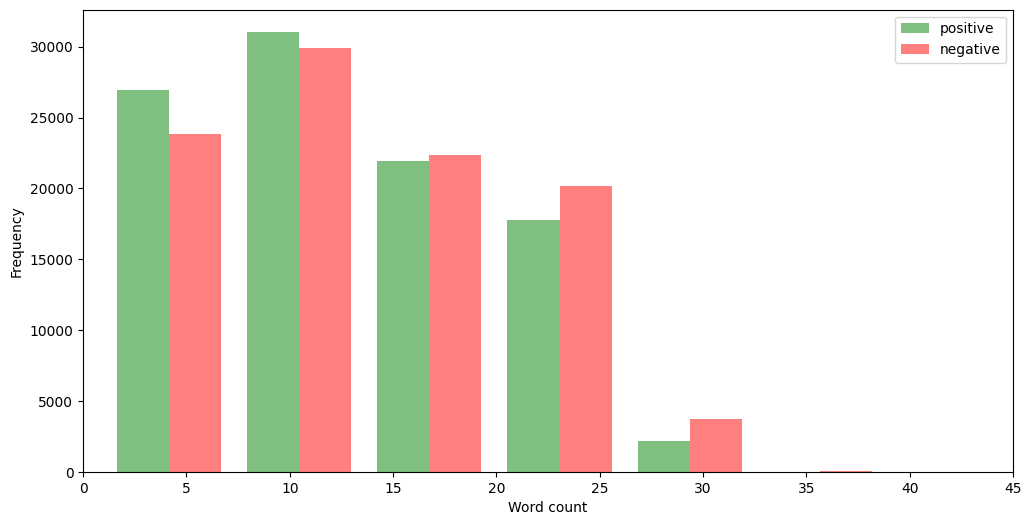

In [ ]:
# plot word count distribution for both positive and negative

data['word count'] = data['text'].apply(word_count)
p = data['word count'][data.polarity == 1]
n = data['word count'][data.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [ ]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())


Counter(all_words).most_common(20)

[('the', 64908),
 ('and', 37218),
 ('you', 29814),
 ('for', 26797),
 ('have', 17986),
 ('that', 16026),
 ("i'm", 15985),
 ('just', 15737),
 ('but', 15726),
 ('with', 14191),
 ('not', 12889),
 ('was', 12848),
 ('this', 11037),
 ('get', 10157),
 ('are', 9560),
 ('like', 9442),
 ('good', 9440),
 ('all', 9257),
 ('out', 8650),
 ('your', 8155)]

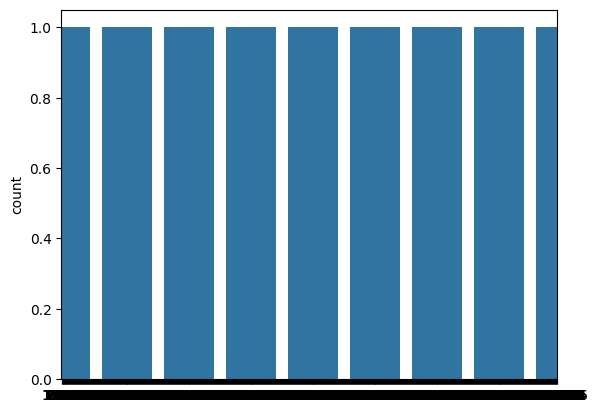

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample a smaller subset of data for plotting
sample_data = data.sample(n=1000, random_state=1)  # Adjust the sample size as needed

# Plot count of polarities
sns.countplot(sample_data['polarity'])
plt.show()


In [ ]:
# Removing the unnecessary columns.
data.drop(['date','query','user','word count'], axis=1, inplace=True)

In [ ]:
data.drop('id', axis=1, inplace=True)

In [ ]:
data.head(10)

,polarity,text
1405257,1,@Nkotb_Det_Army enjoy your beach day! I am bac...
379808,0,And still it rains
629459,0,@erinmichelle84 And it was near 10pm EDT when...
1232641,1,"@green_i_girl I miss you guys, too. It would b..."
1133071,1,Just left abby's. Now headed katie's to hang o...
1226029,1,@Nilabhra KEPT THE PREVOIUS PIC......NOW....HA...
1052850,1,@THEREALDWELE damn! What on earth happened to ...
159653,0,"just got a new camrea, charging since 6 pm"
27944,0,loosing this sucks
235676,0,@tommcfly that youtube link isnt avaliable in ...


In [ ]:
#Checking if any null values present
(data.isnull().sum() / len(data))*100

polarity    0.0
text        0.0
dtype: float64

In [ ]:
#convrting pandas object to a string type
data['text'] = data['text'].astype('str')

In [ ]:
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{"you'd", 'll', 'any', 't', 'no', "wouldn't", 'from', 'where', 'their', "you've", 'those', 'ourselves', 'down', 'to', 've', 'few', 'own', 'hasn', 'will', 'which', 'for', 'shouldn', "won't", "isn't", 'that', 'has', 'further', 'mustn', 'himself', 'into', 'd', 'was', 'her', "mightn't", 'with', "you're", 'before', 'is', 'or', 'whom', "doesn't", 'don', 'while', 'its', 'up', 'wasn', 'doing', "couldn't", 'aren', 'of', "shan't", 'hers', 'he', 'what', 'ours', 'ma', 'mightn', 'm', 'only', 'each', 'more', 'a', 'below', 'am', "you'll", 'me', 'been', 'hadn', 'do', 'yourself', 'under', 'against', 'theirs', 'weren', 'again', 'too', 'because', 'some', "shouldn't", 'o', 'they', 'myself', "haven't", "it's", 'were', 'such', 'y', 'him', "that'll", 'why', 'did', 'not', "hasn't", 'wouldn', 'very', 'won', 'other', 'ain', 'then', 'having', 'are', 'now', 'an', 's', 'during', 'should', 'themselves', 'couldn', 'isn', "should've", "she's", "hadn't", 'but', 'haven', 'and', 'these', 'if', 'my', 'she', 'it', 'does',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet)
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
    #reducing a word to its word stem
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [ ]:
data['processed_tweets'] = data['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [ ]:
data.head(10)

,polarity,text,processed_tweets
1405257,1,@Nkotb_Det_Army enjoy your beach day! I am bac...,nkotbdetarmy enjoy beach day back michigan poo...
379808,0,And still it rains,nd still rain
629459,0,@erinmichelle84 And it was near 10pm EDT when...,erinmichelle84 near 10pm edt posted sound like...
1232641,1,"@green_i_girl I miss you guys, too. It would b...",greenigirl miss guy would nice around especial...
1133071,1,Just left abby's. Now headed katie's to hang o...,ust left abbys headed katies hang kev good time
1226029,1,@Nilabhra KEPT THE PREVOIUS PIC......NOW....HA...,nilabhra kept prevoius picnowhappy
1052850,1,@THEREALDWELE damn! What on earth happened to ...,therealdwele damn earth happened
159653,0,"just got a new camrea, charging since 6 pm",ust got new camrea charging since pm
27944,0,loosing this sucks,oosing suck
235676,0,@tommcfly that youtube link isnt avaliable in ...,tommcfly youtube link isnt avaliable england xx


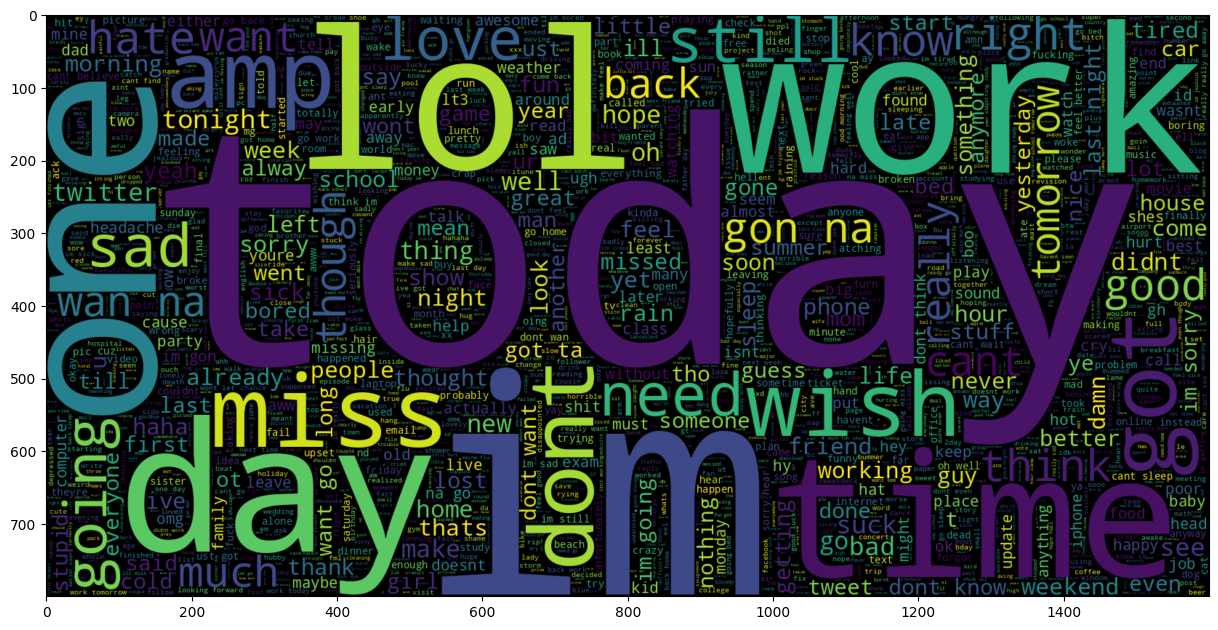

In [ ]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 0].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

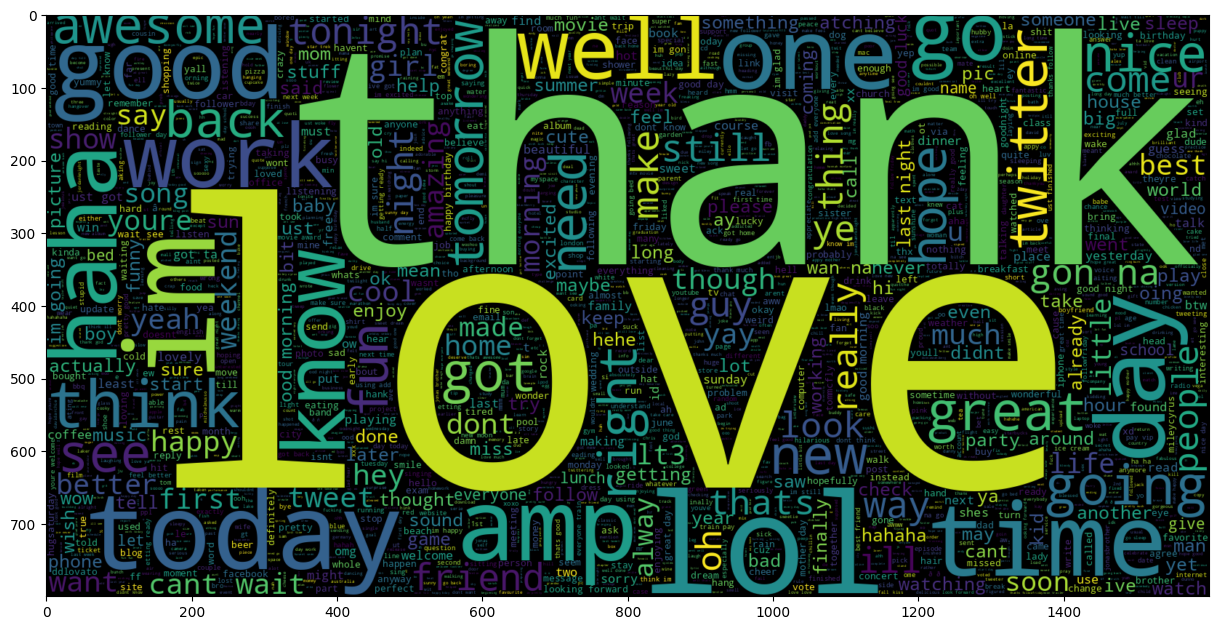

In [ ]:
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.polarity == 1].processed_tweets))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
X = data['processed_tweets'].values
y = data['polarity'].values

In [ ]:
print(X.shape)
print(y.shape)

(200000,)
(200000,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import pandas as pd

# Assuming 'data' DataFrame is already defined and contains a 'text' column
raw_documents = data['text'].tolist()

# Step 1: CountVectorizer to convert text data to a matrix of token counts
count_vectorizer = CountVectorizer()
X_counts = count_vectorizer.fit_transform(raw_documents)

# Step 2: TfidfTransformer to compute TF-IDF features
tfidf_transformer = TfidfTransformer(sublinear_tf=True)
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Print confirmation and number of feature words
print('TF-IDF Vector fitted.')
print('Number of feature words:', X_tfidf.shape[1])  # Number of columns represents the number of feature words

# Optionally, if you want to see the actual feature names (words)
feature_names = count_vectorizer.get_feature_names_out()
print('Example feature names:', feature_names[:10])  # Print first 10 feature names


TF-IDF Vector fitted.
Number of feature words: 160356
Example feature names: ['00' '000' '00004873337e0033fea60' '0001110101001010000111' '0007' '000k'
 '000martha' '000th' '001' '002']


In [ ]:
print(X.shape)
print(y.shape)


(200000, 169826)
(200000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=101)

In [ ]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print()
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (160000, 169826)
y_train (160000,)

X_test (40000, 169826)
y_test (40000,)


In [ ]:
def model_Evaluate(model):
    #accuracy of model on training data
    acc_train=model.score(X_train, y_train)
    #accuracy of model on test data
    acc_test=model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


Accuracy of model on training data : 83.31125
Accuracy of model on testing data : 76.925 

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     19981
           1       0.76      0.80      0.78     20019

    accuracy                           0.77     40000
   macro avg       0.77      0.77      0.77     40000
weighted avg       0.77      0.77      0.77     40000



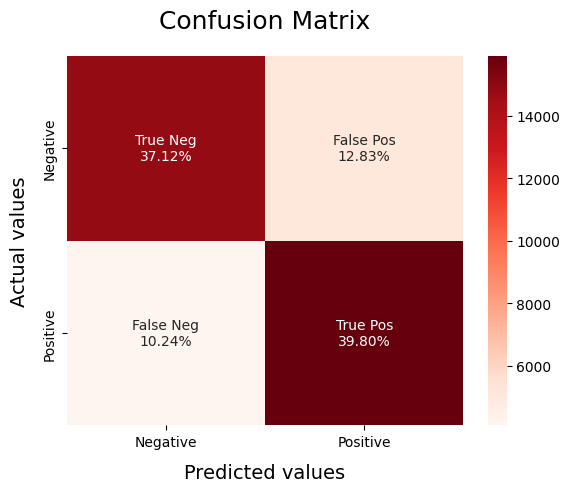

In [ ]:
lg = LogisticRegression()
history=lg.fit(X_train, y_train)
model_Evaluate(lg)

Accuracy of model on training data : 93.0475
Accuracy of model on testing data : 76.0725 

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     19981
           1       0.75      0.78      0.76     20019

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



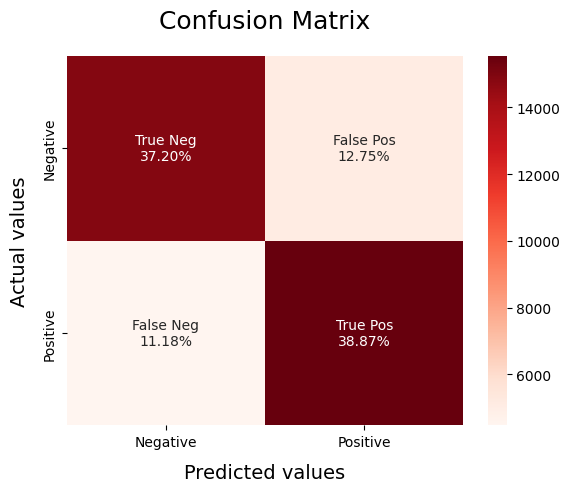

In [ ]:
svm = LinearSVC()
svm.fit(X_train, y_train)
model_Evaluate(svm)

Accuracy of model on training data : 76.151875
Accuracy of model on testing data : 71.23 

              precision    recall  f1-score   support

           0       0.75      0.64      0.69     19981
           1       0.69      0.79      0.73     20019

    accuracy                           0.71     40000
   macro avg       0.72      0.71      0.71     40000
weighted avg       0.72      0.71      0.71     40000



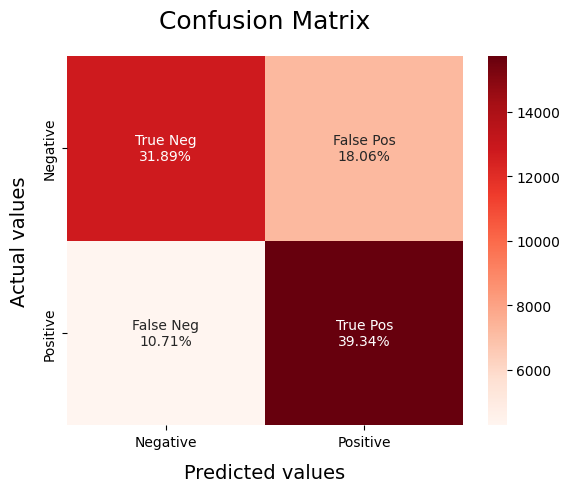

In [ ]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth=50)
rf.fit(X_train, y_train)
model_Evaluate(rf)

Accuracy of model on training data : 86.764375
Accuracy of model on testing data : 75.8625 

              precision    recall  f1-score   support

           0       0.75      0.78      0.76     19981
           1       0.77      0.74      0.75     20019

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000



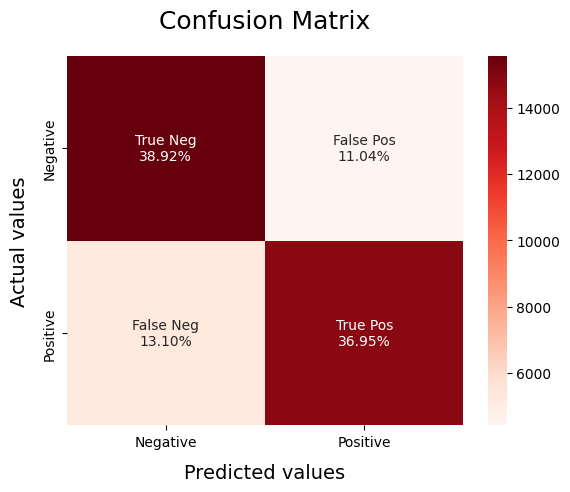

In [ ]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
model_Evaluate(nb)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical  # Check if this works

import re


In [ ]:
import keras
keras.__version__

'2.15.0'

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data.processed_tweets)
sequences = tokenizer.texts_to_sequences(data.processed_tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   38  669    2]
 [   0    0    0 ...  410   28  151]
 [   0    0    0 ...    5   95    2]
 ...
 [   0    0    0 ... 1856  205   21]
 [   0    0    0 ...    8  642 1546]
 [   0    0    0 ...  191  348  498]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, data.polarity.values, test_size=0.2, random_state=101)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
model2 = Sequential()
model2.add(layers.Embedding(max_words, 128))
model2.add(layers.LSTM(64,dropout=0.5))
model2.add(layers.Dense(16, activation='relu'))
model2.add(layers.Dense(8, activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
5000/5000 [==============================] - ETA: 0s - loss: 0.5084 - accuracy: 0.7466
Epoch 1: val_accuracy improved from -inf to 0.76520, saving model to rnn_model.hdf5
5000/5000 [==============================] - 889s 177ms/step - loss: 0.5084 - accuracy: 0.7466 - val_loss: 0.4848 - val_accuracy: 0.7652
Epoch 2/10
5000/5000 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.7751
Epoch 2: val_accuracy improved from 0.76520 to 0.76895, saving model to rnn_model.hdf5
5000/5000 [==============================] - 890s 178ms/step - loss: 0.4676 - accuracy: 0.7751 - val_loss: 0.4789 - val_accuracy: 0.7689
Epoch 3/10
5000/5000 [==============================] - ETA: 0s - loss: 0.4508 - accuracy: 0.7842
Epoch 3: val_accuracy did not improve from 0.76895
5000/5000 [==============================] - 886s 177ms/step - loss: 0.4508 - accuracy: 0.7842 - val_loss: 0.4795 - val_accuracy: 0.7686
Epoch 4/10
5000/5000 [==============================] - ETA: 0s - loss: 0

In [ ]:
sequence = tokenizer.texts_to_sequences(['this data science article is the worst ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model2.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

1/1 [==============================] - 5s 5s/step
Negative


In [ ]:
model = keras.models.load_model('rnn_model.hdf5')
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 1s 751ms/step
Positive


In [ ]:
sequence = tokenizer.texts_to_sequences(['I had a bad day at work.'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')

1/1 [==============================] - 0s 53ms/step
Negative


In [ ]:
import pickle

file = open('vectoriser.pickle','wb')
pickle.dump(vector, file)
file.close()

file = open('logisticRegression.pickle','wb')
pickle.dump(lg, file)
file.close()

file = open('SVM.pickle','wb')
pickle.dump(svm, file)
file.close()

file = open('RandomForest.pickle','wb')
pickle.dump(rf, file)
file.close()

file = open('NaivesBayes.pickle','wb')
pickle.dump(nb, file)
file.close()

In [ ]:
def load_models():
    # Load the vectoriser.
    file = open('vectoriser.pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('logisticRegression.pickle', 'rb')
    lg = pickle.load(file)
    file.close()
    return vectoriser, lg

In [ ]:
def predict(vectoriser, model, text):
    # Predict the sentiment
    processes_text=[process_tweets(sen) for sen in text]
    textdata = vectoriser.transform(processes_text)
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

In [ ]:
if __name__=="__main__":
    # Loading the models.
    vectoriser, lg = load_models()

    # Text to classify should be in a list.
    text = ["I love machine learning",
            "Work is too hectic.",
            "Mr.Sharama, I feel so good",
            "weather is bad",
            "i am sad"]

    df = predict(vectoriser, lg, text)
    print(df.head())

                         text sentiment
0     I love machine learning  Positive
1         Work is too hectic.  Negative
2  Mr.Sharama, I feel so good  Positive
3              weather is bad  Negative
4                    i am sad  Negative


X_train (160000, 169826)
y_train (160000,)

X_test (40000, 169826)
y_test (40000,)


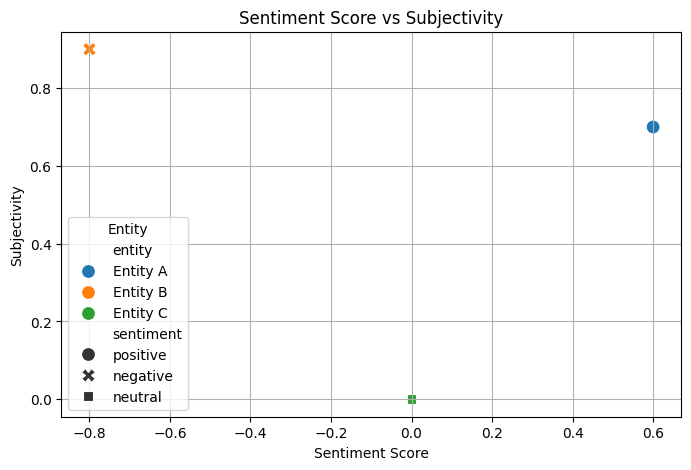

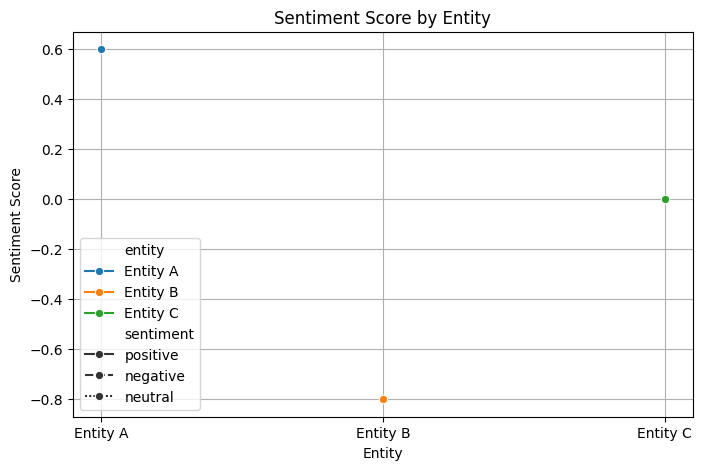

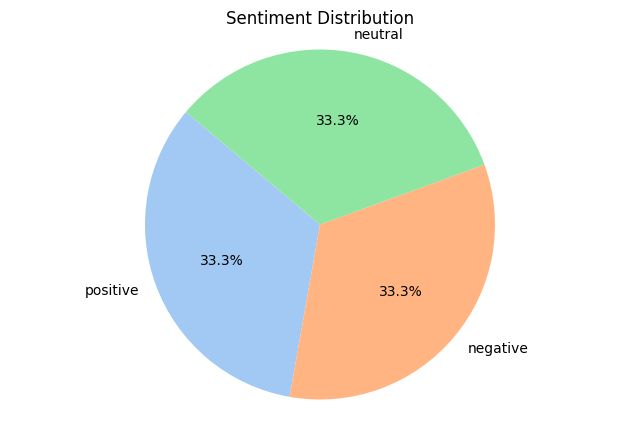

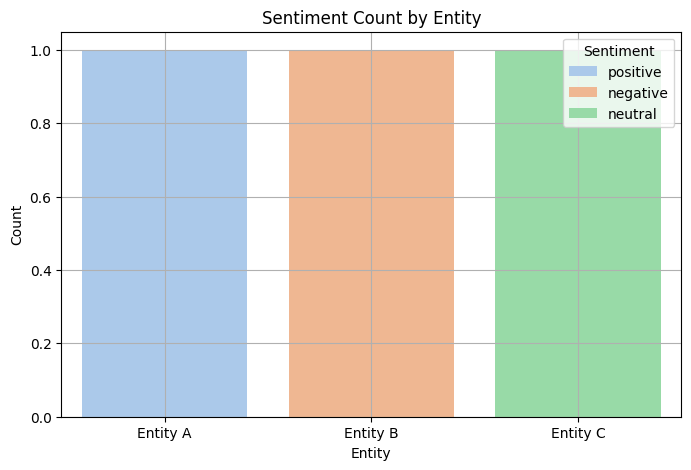

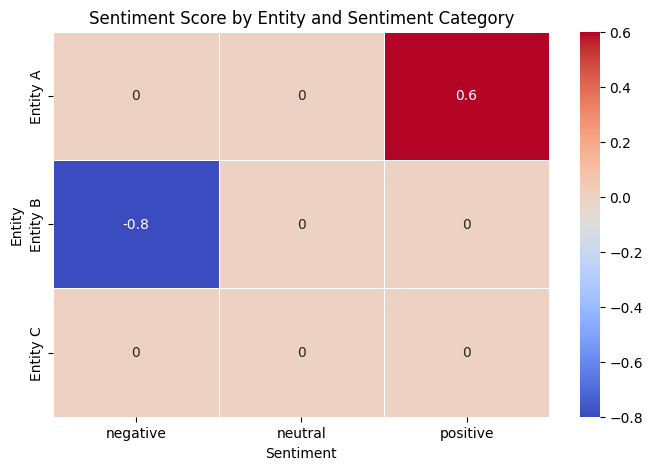

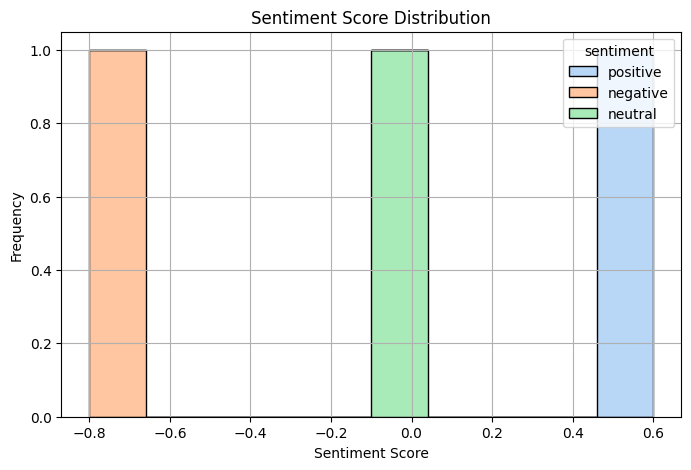

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Sample text data
data = {
    'entity': ['Entity A', 'Entity B', 'Entity C'],
    'text': [
        "I love sunny days. They make me feel so happy and energetic.",
        "I hate it when it rains. It makes me feel so gloomy.",
        "I am neutral about the weather. It does not affect my mood."
    ]
}
X_train_shape = (160000, 169826)
y_train_shape = (160000,)
X_test_shape = (40000, 169826)
y_test_shape = (40000,)
print("X_train", X_train_shape)
print("y_train", y_train_shape)
print()
print("X_test", X_test_shape)
print("y_test", y_test_shape)
df = pd.DataFrame(data)

# Function to calculate sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
df[['sentiment_score', 'subjectivity']] = df['text'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Add sentiment category
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# 1. Scatter Plot: Sentiment Score vs Subjectivity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sentiment_score', y='subjectivity', hue='entity', style='sentiment', s=100)
plt.title('Sentiment Score vs Subjectivity')
plt.xlabel('Sentiment Score')
plt.ylabel('Subjectivity')
plt.legend(title='Entity')
plt.grid(True)
plt.show()

# 2. Line Graph: Sentiment Score by Entity
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='entity', y='sentiment_score', marker='o', hue='entity', style='sentiment')
plt.title('Sentiment Score by Entity')
plt.xlabel('Entity')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()

# 3. Pie Chart: Sentiment Distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# 4. Bar Chart: Sentiment Count by Entity
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='entity', hue='sentiment', palette='pastel')
plt.title('Sentiment Count by Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

# 5. Heat Map: Sentiment Score by Entity and Sentiment Category
df_pivot = df.pivot_table(values='sentiment_score', index='entity', columns='sentiment', fill_value=0)
plt.figure(figsize=(8, 5))
sns.heatmap(df_pivot, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Sentiment Score by Entity and Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Entity')
plt.show()

# 6. Histogram: Sentiment Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='sentiment_score', hue='sentiment', multiple='stack', palette='pastel', bins=10)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# Sample data shapes
X_train_shape = (160000, 169826)
y_train_shape = (160000,)
X_test_shape = (40000, 169826)
y_test_shape = (40000,)

print("X_train", X_train_shape)
print("y_train", y_train_shape)
print()
print("X_test", X_test_shape)
print("y_test", y_test_shape)

def model_Evaluate(model, X_train, y_train, X_test, y_test):
    # Accuracy of model on training data
    acc_train = model.score(X_train, y_train)
    # Accuracy of model on test data
    acc_test = model.score(X_test, y_test)

    print('Accuracy of model on training data : {}'.format(acc_train*100))
    print('Accuracy of model on testing data : {} \n'.format(acc_test*100))

    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()

    # Additional Visualizations

    # 1. Scatter Plot: True vs Predicted
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot of True vs Predicted Values')
    plt.grid(True)
    plt.show()

    # 2. Line Graph: Predicted vs Index
    plt.figure(figsize=(8, 5))
    plt.plot(y_test[:100], label='True Values')
    plt.plot(y_pred[:100], label='Predicted Values', linestyle='dashed')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Line Graph of True vs Predicted Values')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 3. Pie Chart: Distribution of True Labels
    true_counts = np.bincount(y_test)
    plt.figure(figsize=(8, 5))
    plt.pie(true_counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title('Distribution of True Labels')
    plt.axis('equal')
    plt.show()

    # 4. Bar Chart: Distribution of Predicted Labels
    pred_counts = np.bincount(y_pred)
    plt.figure(figsize=(8, 5))
    plt.bar(categories, pred_counts, color=sns.color_palette("pastel"))
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.title('Distribution of Predicted Labels')
    plt.grid(True)
    plt.show()

    # 5. Heat Map: Confusion Matrix (already shown above)
    plt.figure(figsize=(8, 5))
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='g', xticklabels=categories, yticklabels=categories)
    plt.title('Heat Map of Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # 6. Histogram: Distribution of Predicted Values
    plt.figure(figsize=(8, 5))
    plt.hist(y_pred, bins=30, color='skyblue', edgecolor='black')
    plt.xlabel('Predicted Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Predicted Values')
    plt.grid(True)
    plt.show()

# Example usage
# Assuming you have a trained model and your data split into X_train, y_train, X_test, y_test
# model = ... # Your trained model
# model_Evaluate(model, X_train, y_train, X_test, y_test)


X_train (160000, 169826)
y_train (160000,)

X_test (40000, 169826)
y_test (40000,)
